## Twitter US Airline Sentiment Analysis -DataVisualization

The aim of this project is to build a model for sentiment analysis based on the Twitter US Airline Datasets.

The Twitter US Airline Dataset :
* Tweets since Feb 2015 about each of the major US airline (US Airways, Virgin America, Delta, United, American Airlines, Southwest)
* Each tweet is classified either positive, negative or neutral.


The included features including :
- Twitter ID, sentiment confidence score, sentiments, negative reasons, airline name, retweet count, name, tweet text, tweet coordinates, date and time of the tweet, and the location of the tweet.

Download dataset from here : https://www.kaggle.com/crowdflower/twitter-airline-sentiment

## 1 - Packages

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
#import wordcloud and stopwords
from wordcloud import WordCloud,STOPWORDS

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

## 2- Explore the Dataset

In [4]:
# Import of data
df = pd.read_csv('Data/Tweets.csv')
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [5]:
#to get the shape of the datasets
print (' 1- Number of tweets in the datasets: ' ,df.shape[0])
print(' 2- Number of tweet per type of sentiment :')
print(df['airline_sentiment'].value_counts())


 1- Number of tweets in the datasets:  14640
 2- Number of tweet per type of sentiment :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


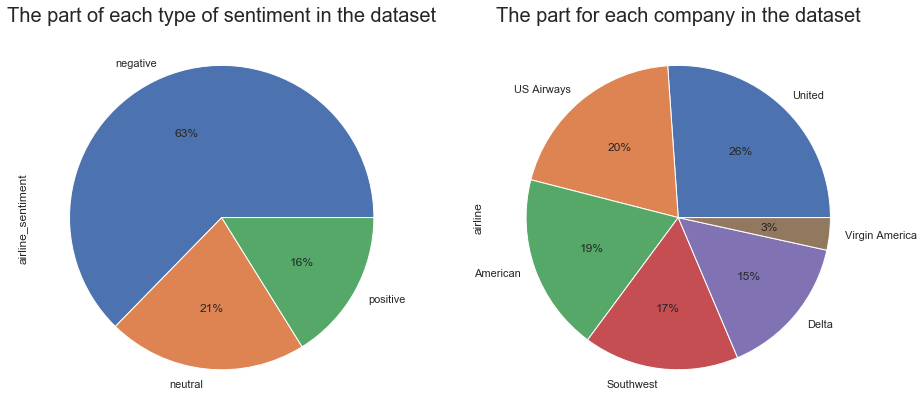

In [6]:
sns.set(rc={'figure.figsize': (15, 15)})
color=sns.color_palette("hls", 8)
plt.subplot(1,2,1)
ax1=df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')
ax1.set_title('The part of each type of sentiment in the dataset', fontsize=20)
plt.subplot(1,2,2)
ax2=df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')
ax2.set_title('The part for each company in the dataset', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Reason for negative sentiment')

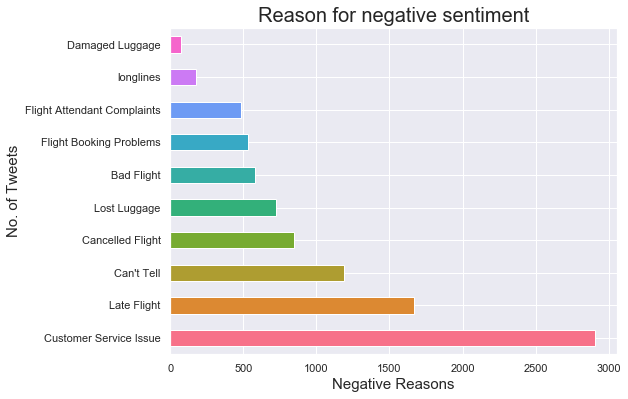

In [7]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(df["negativereason"]).value_counts().plot(kind = "barh",
                        color=color,figsize=(8,6))
plt.xlabel('Negative Reasons', fontsize=15)
plt.ylabel('No. of Tweets', fontsize=15)
plt.title('Reason for negative sentiment', fontsize=20)

In [8]:
airline_sentiment=pd.crosstab(df.airline, df.airline_sentiment)
airline_sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [9]:
percent=airline_sentiment.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


Text(0.5, 1.0, 'Sentiment by airline')

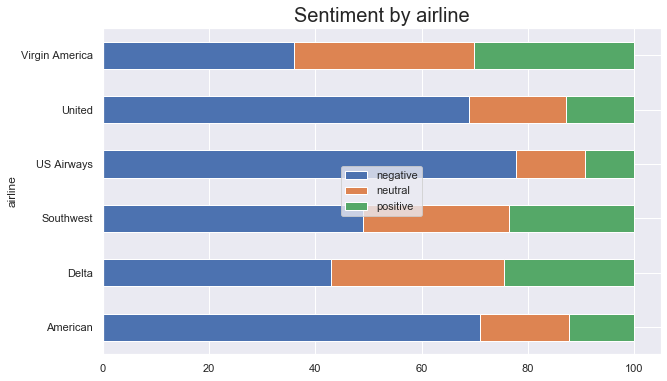

In [10]:
ax=percent.plot(kind='barh',figsize=(10, 6),stacked=True)
color=sns.color_palette("husl", 10)
ax.legend(loc='center')
plt.title('Sentiment by airline', fontsize=20)

In [11]:
import matplotlib.pyplot as plt
 
def plot_WordCloud(df,sentiment):
    data=df[df['airline_sentiment']==sentiment]
    # join tweets to a single string\n",
    words = ' '.join(data['text'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                         background_color='white',
                          width=2000,
                          height=1500,
                         ).generate(words)
    
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('WordCloud for ' +  str(sentiment) +  ' sentiment',fontsize=30)
    plt.show()

## WordCloud for positive, negative and neutral sentiment

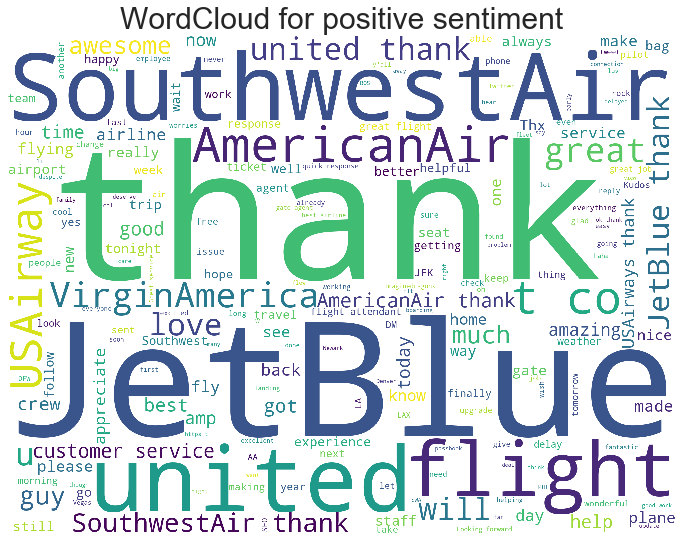

In [12]:
plot_WordCloud(df=df,sentiment='positive')

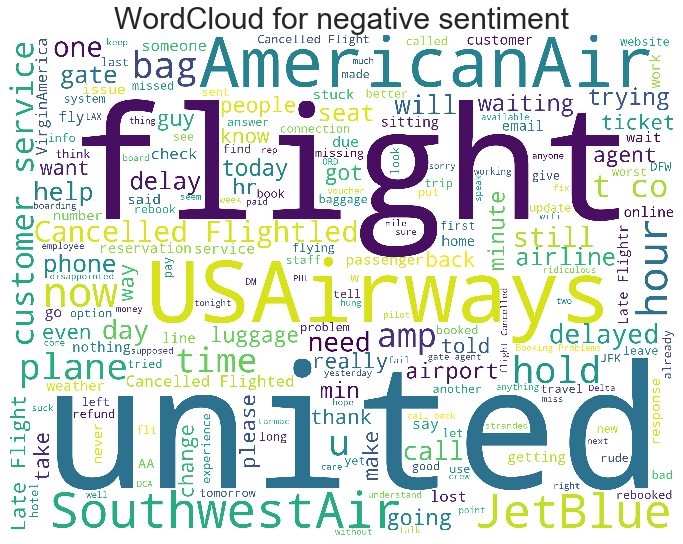

In [13]:
plot_WordCloud(df=df,sentiment='negative')

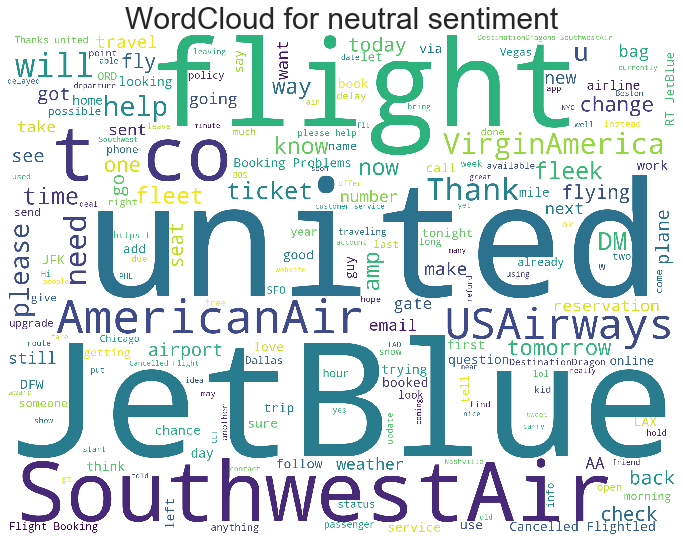

In [14]:
plot_WordCloud(df=df,sentiment='neutral')

### Comments :
- The Airline names are the most present words in positive, negative and neural
- In the data processing, the names of companies will be deleted